# AGNerds Project

#### PRIMER is a project with the James Webb Space Telescope that is observing two different fields (UDS and COSMOS) that were also observed with the Hubble Space Telescope.

#### Hubble observed these fields as part of the CANDELS program. Extensive work was done by the team over the course of a decade to measure the redshift (or distance from us) and mass of each galaxy. The CANDELS catalogs are saved as the “uds…fits” and “cosmos…fits” files. Download TOPCat (https://www.star.bris.ac.uk/~mbt/topcat/#intro) to easily view fits files. Now, the PRIMER team has also measured these quantities using JWST data.

#### It is imperative that we determine how good the new measurements are. The PRIMER data is going to be used by several group members, and we must decide which redshifts to use.

#### Christian will match the PRIMER photometric catalogs with the original HST photometric catalogs using RA and Dec. He will determine whether matches are correct by looking at the photometric fluxes in each catalog. He will then plot the redshifts from each catalog and the stellar masses to determine how well they agree.


# First, lets open up the files

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import astropy as ast
from astropy import units as u
from astropy.io import fits
import astropy.table
from astropy.table import QTable

In [41]:
PrimerCosmos = fits.open('PRIMER-COSMOS_v2.0.0_LW_Kf444w_SUPER_CATALOG.fits')
PrimerUDSSuper = fits.open('PRIMER-UDS_v2.0.0_LW_Kf444w_SUPER_CATALOG.fits')
PrimerUDS = fits.open('PRIMER-UDS_v2.0.0_catalog (1).fits')
HSTCosmos = fits.open('cos_merged_v1.1.fits')
HSTUDS = fits.open('uds_merged_v1.1.fits')

# First lets grab the RA and DEC values from the cataloges. You can do this by looking at the headers.

In [42]:
PrimerCosmosRA = PrimerCosmos[1].data['ra']
PrimerCosmosDEC = PrimerCosmos[1].data['dec']

PrimerUDSSuperRA = PrimerUDSSuper[1].data['ra']
PrimerUDSSuperDEC = PrimerUDSSuper[1].data['dec']

PrimerUDSRA = PrimerUDS[1].data['RA']
PrimerUDSDEC = PrimerUDS[1].data['DEC']

HSTCosmosRA = HSTCosmos[1].data['RA']
HSTCosmosDEC = HSTCosmos[1].data['DEC']

HSTUDSRA = HSTUDS[1].data['RA']
HSTUDSDEC = HSTUDS[1].data['DEC']

In [43]:
#Using QTable to create a table with the RA and DEC values to double check with TOPCAT
PrimerCosmosTable = QTable([PrimerCosmosRA, PrimerCosmosDEC], names=('RA', 'DEC'))
PrimerUDSSuperTable = QTable([PrimerUDSSuperRA, PrimerUDSSuperDEC], names=('RA', 'DEC'))
PrimerUDSTable = QTable([PrimerUDSRA, PrimerUDSDEC], names=('RA', 'DEC'))
HSTCosmosTable = QTable([HSTCosmosRA, HSTCosmosDEC], names=('RA', 'DEC'))

#Print out the tables
#PrimerCosmosTable
#PrimerUDSSuperTable
#PrimerUDSTable
#HSTCosmosTable

In [44]:
#Print out the length of the tables
print(len(PrimerCosmosTable))
print(len(PrimerUDSSuperTable))
print(len(PrimerUDSTable))
print(len(HSTCosmosTable))

116247
78275
78275
38671


# To compare the RA and Dec, I want to first create a boundary which is the Point Spread Function. The PSF is the irradiance distribution that results from a single point source. JWST and HST have similar qualities, so you can use 0.1 as the PSF.

In [45]:
PSF = 0.1

# Start by checking the COSMOS RA and then do the same for DEC

In [46]:
# Create empty tables for matching and rejected sources
CosmosMatching_Table = QTable(names=('RA', 'DEC'))
CosmosRejected_Table = QTable(names=('RA', 'DEC'))

# Lets compare the RA and DEC values simultaneously for PrimerCosmos and HSTCosmos
for i in range(len(PrimerCosmosRA)):
    for j in range(len(HSTCosmosRA)):
        if abs(PrimerCosmosRA[i] - HSTCosmosRA[j]) < PSF and abs(PrimerCosmosDEC[i] - HSTCosmosDEC[j]) < PSF:
            CosmosMatching_Table.add_row([PrimerCosmosRA[i], PrimerCosmosDEC[i]])
            break
    else:
        CosmosRejected_Table.add_row([PrimerCosmosRA[i], PrimerCosmosDEC[i]])

#Print out lenghts of the tables
print("There are", len(CosmosMatching_Table), "matching sources in COSMOS Field")
print("There are", len(CosmosRejected_Table), "rejected sources in COSMOS Field")

There are 116247 matching sources in COSMOS Field
There are 0 rejected sources in COSMOS Field


# Now we can do the same thing for the UDS Field

In [47]:
# Create empty tables for matching and rejected sources
UDSMatching_Table = QTable(names=('RA', 'DEC'))
UDSRejected_Table = QTable(names=('RA', 'DEC'))

# Lets compare the RA and DEC values simultaneously for PrimerUDS and HSTUDS
for i in range(len(PrimerUDSRA)):
    for j in range(len(HSTUDSRA)):
        if abs(PrimerUDSRA[i] - HSTUDSRA[j]) < PSF and abs(PrimerUDSDEC[i] - HSTUDSDEC[j]) < PSF:
            UDSMatching_Table.add_row([PrimerUDSRA[i], PrimerUDSDEC[i]])
            break
    else:
        UDSRejected_Table.add_row(PrimerUDSRA[i], PrimerUDSDEC[i])

#Print out lenghts of the tables
print("There are", len(UDSMatching_Table), "matching sources in UDS Field")
print("There are", len(UDSRejected_Table), "rejected sources in UDS Field")                                

There are 78275 matching sources in UDS Field
There are 0 rejected sources in UDS Field


## These results are expected as the optics on JWST and HST are pretty much the same. Since there are no rejected in either field, this means that the objects are physically the same object.

## Now we have to check how the photometric values compare and then plot thier redshifts. First I need to grab the photometric values from the cataloges and append them to the PRIMER catalo

In [57]:
PrimerUDSZphote = PrimerUDS[1].data['z_phot']
CosmosZPhote= HSTCosmos[1].data['zphot']
UDSZPhote = HSTUDS[1].data['zphot']

#Making QTables for the zphot values
PrimerUDSZphoteTable = QTable([PrimerUDSZphote], names=('z_phot',), dtype=(float,))
CosmosZphoteTable = QTable([CosmosZPhote], names=('z_phot',), dtype=(float,))
UDSZphoteTable = QTable([UDSZPhote], names=('z_phot',), dtype=(float,))

#Printing the QTables
#PrimerUDSZphoteTable
#CosmosZphoteTable
#UDSZphoteTable

In [66]:
#Print the length of the tables
print(len(PrimerUDSZphoteTable))
print(len(CosmosZphoteTable))
print(len(UDSZphoteTable))
print(len(UDSZphoteTable)+len(CosmosZphoteTable))

78275
38671
35932
74603


# In this I want to use $\chi^2$ of 1 as my boundary.

In [74]:
Chi2 = 1

# Now lets plot the redshifts with the HST on the X axis and JWST on the Y axis.

In [77]:
matched_PrimerUDSZphote = []
matched_UDSZPhote = []

for z_primer in PrimerUDSZphote:
    closest_diff = float('inf')  # Initialize with a large number
    closest_UDS_z = None
    for z_UDS in UDSZPhote:
        diff = abs(z_primer - z_UDS)
        if diff < 0.1 and diff < closest_diff:
            closest_diff = diff
            closest_UDS_z = z_UDS
    if closest_UDS_z is not None:
        matched_PrimerUDSZphote.append(z_primer)
        matched_UDSZPhote.append(closest_UDS_z)




In [81]:
matched_PrimerUDSZphote = []  # List to hold matched PrimerUDSZphote values
matched_UDSZPhote = []        # List to hold matched UDSZPhote values
rejected_PrimerUDSZphote = []  # List to hold rejected PrimerUDSZphote values

for z_primer in PrimerUDSZphote:
    closest_diff = float('inf')  # Initialize with a large number
    closest_UDS_z = None
    for z_UDS in UDSZPhote:
        diff = abs(z_primer - z_UDS)
        if diff < 0.1 and diff < closest_diff:
            closest_diff = diff
            closest_UDS_z = z_UDS
    if closest_UDS_z is not None:
        matched_PrimerUDSZphote.append(z_primer)
        matched_UDSZPhote.append(closest_UDS_z)
    else:
        rejected_PrimerUDSZphote.append(z_primer)

matched_PrimerUDSZphote_array = np.array(matched_PrimerUDSZphote)
matched_UDSZPhote_array = np.array(matched_UDSZPhote)
rejected_PrimerUDSZphote_array = np.array(rejected_PrimerUDSZphote)

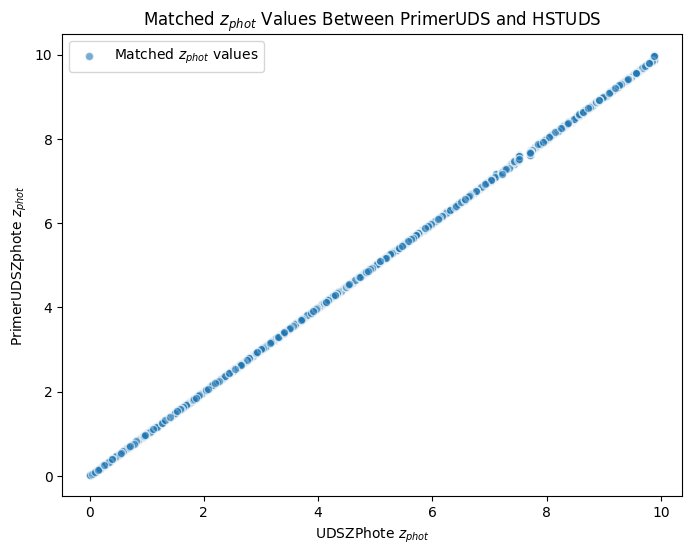

In [78]:
matched_PrimerUDSZphote = np.array(matched_PrimerUDSZphote)
matched_UDSZPhote = np.array(matched_UDSZPhote)

# Now plotting the matched values against each other in a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(matched_UDSZPhote, matched_PrimerUDSZphote, alpha=0.6, edgecolor='w', label='Matched $z_{phot}$ values')
plt.xlabel('UDSZPhote $z_{phot}$')
plt.ylabel('PrimerUDSZphote $z_{phot}$')
plt.title('Matched $z_{phot}$ Values Between PrimerUDS and HSTUDS')
plt.legend()
plt.show()

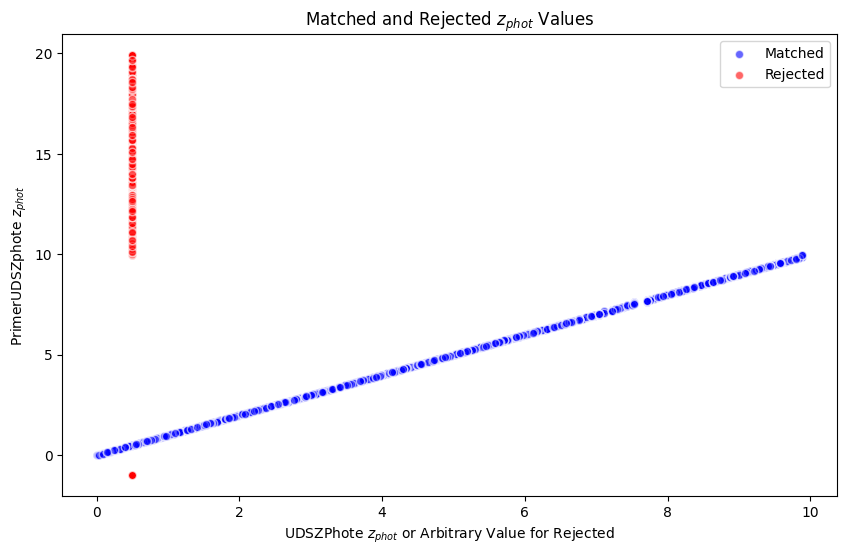

In [82]:
arbitrary_UDSZ_value = 0.5
matched_PrimerUDSZphote = np.array(matched_PrimerUDSZphote)
matched_UDSZPhote = np.array(matched_UDSZPhote)
rejected_PrimerUDSZphote = np.array(rejected_PrimerUDSZphote)
arbitrary_x_for_rejected = np.full_like(rejected_PrimerUDSZphote, arbitrary_UDSZ_value)

# Plotting
plt.figure(figsize=(10, 6))

# Plot matched pairs
plt.scatter(matched_UDSZPhote, matched_PrimerUDSZphote, alpha=0.6, edgecolors='w', color='blue', label='Matched')

# Plot rejected values
plt.scatter(arbitrary_x_for_rejected, rejected_PrimerUDSZphote, alpha=0.6, edgecolors='w', color='red', label='Rejected')

plt.xlabel('UDSZPhote $z_{phot}$ or Arbitrary Value for Rejected')
plt.ylabel('PrimerUDSZphote $z_{phot}$')
plt.title('Matched and Rejected $z_{phot}$ Values')
plt.legend()
plt.show()